In [1]:
import matplotlib.pyplot as plt
import pywt
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd

Зчитуємо дані з csv-файлу

In [2]:
data_array = pd.read_csv('dates_docs.csv',delimiter=';')

In [3]:
data_array

,date,count
0,02.02.2022,1
1,03.02.2022,0
2,04.02.2022,2
3,05.02.2022,0
4,06.02.2022,2
5,07.02.2022,1
6,08.02.2022,1
7,09.02.2022,0
8,10.02.2022,2
9,11.02.2022,3


In [4]:
D=data_array["count"].values

Віконне згладжування часового ряду

In [5]:
M=8
N=len(D)
Z=np.random.rand(M,N)
C=D

In [6]:
for i in range(N):
    for j in range(M):
        Z[j][i]=D[i]
for j in range(M):
    for k in range(j,N-j):
        Z[j][k]=0;
        for l in range(1,j):
            Z[j][k]=Z[j][k]+D[k-l]
            Z[j][k]=Z[j][k]+D[k+l]

    Z[j][k]=Z[j][k]-D[k]
    Z[j][k]=Z[j][k]/(2*j+1)

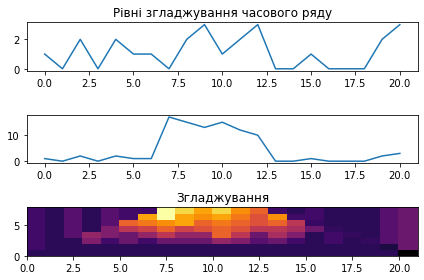

In [7]:
fig,(ax0,ax1,ax2)=plt.subplots(3,1)
ax0.plot(D)
ax0.set_title('Рівні згладжування часового ряду')
fig.tight_layout()
for i in range(N):
    C[i]=Z[7][i]
ax1.plot(C)
fig.tight_layout()
ax2.pcolor(Z,cmap='inferno')
ax2.set_title('Згладжування')
fig.tight_layout()
plt.show()


Експоненціальне згладжування часового ряду

In [8]:
data_array = pd.read_csv('dates_docs.csv',delimiter=';')
D=data_array["count"].values
M=5
N=len(D)
Z=np.random.rand(M,N)
C=D

In [9]:
for i in range(N):
    for j in range(M):
        Z[j][i]=D[i]

for j in range(M):
    alf=j/M
    for k in range(1,N):
        Z[j][k]=D[k]*alf+Z[j][k-1]*(1-alf)

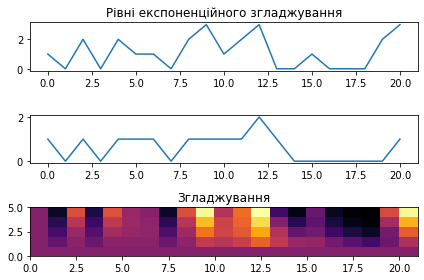

In [10]:
fig,(ax0,ax1,ax2)=plt.subplots(3,1)
ax0.plot(D)
ax0.set_title('Рівні експоненційного згладжування')
fig.tight_layout()
for i in range(N):
    C[i]=Z[2][i]
ax1.plot(C)
fig.tight_layout()
ax2.pcolor(Z,cmap='inferno')
ax2.set_title('Згладжування')
fig.tight_layout()
plt.show()

Побудова вейвлет-скейлограми

In [11]:
data_array = pd.read_csv('dates_docs.csv',delimiter=';')
D=data_array["count"].values
N=len(D)
t= range(N)

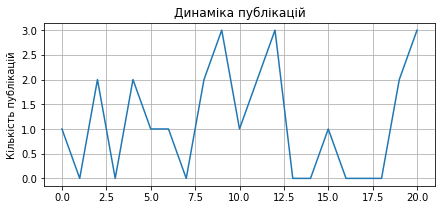

In [12]:
fig,ax1=plt.subplots(figsize=(7,3))
ax1.plot(t, D)
ax1.grid(True)
ax1.set_ylabel("Кількість публікацій")
ax1.set_title("Динаміка публікацій")
plt.show()

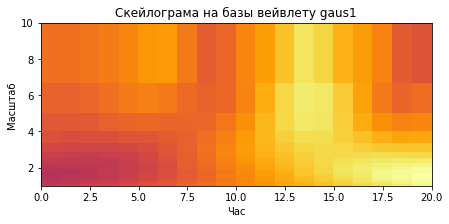

In [20]:
fig,ax5=plt.subplots(figsize=(7,3))
cwtmatr, freqs = pywt.cwt(D, range(1, N), "gaus1", sampling_period = 0.01)
ax5.pcolormesh(t, freqs, cwtmatr, vmin=-10, cmap = "inferno" )
ax5.set_ylim(1,10)
ax5.set_ylabel("Масштаб")
ax5.set_xlabel("Час")
ax5.set_title("Скейлограма на базы вейвлету gaus1")
plt.show()

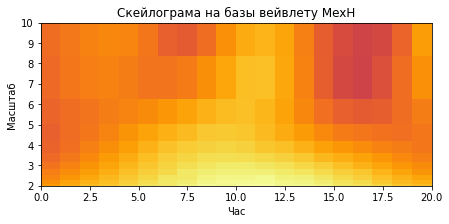

In [21]:
fig,ax4=plt.subplots(figsize=(7,3))
cwtmatr, freqs = pywt.cwt(D, range(1, N), "mexh", sampling_period = 0.01)
ax4.pcolormesh(t, freqs, cwtmatr, vmin=-10, cmap = "inferno" )
ax4.set_ylim(2,10)
ax4.set_ylabel("Масштаб")
ax4.set_xlabel("Час")
ax4.set_title("Скейлограма на базы вейвлету MexH")
plt.show()

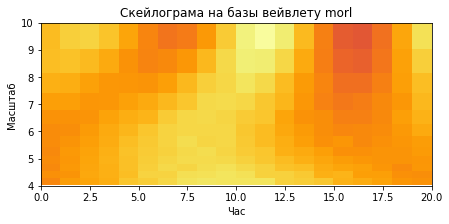

In [22]:
fig,ax5=plt.subplots(figsize=(7,3))
cwtmatr, freqs = pywt.cwt(D, range(1, N), "morl", sampling_period = 0.01)
ax5.pcolormesh(t, freqs, cwtmatr, vmin=-10, cmap = "inferno" )
ax5.set_ylim(4,10)
ax5.set_ylabel("Масштаб")
ax5.set_xlabel("Час")
ax5.set_title("Скейлограма на базы вейвлету morl")
plt.show()